In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [53]:
end_date = dt.datetime.today()
start_date = end_date - pd.Timedelta(days = 2520)

In [54]:
stock = '^NSEI'
df = yf.download(stock,start_date,end_date)

[*********************100%%**********************]  1 of 1 completed


In [55]:
df.drop(columns = ['Volume','Close'],inplace = True)

In [56]:
df['simple returns'] = df['Adj Close'].pct_change()

In [57]:
df['ma'] = df['Adj Close'].rolling(window = 5).mean()
df['ma'] = df['ma'].shift(1)

In [58]:
df['positions'] = np.where((df['Adj Close'].shift(1)<df['ma']) & (df['Adj Close']>df['ma']), 1, 0)
# df['positions'] = np.where((df['Adj Close'].shift(1)>df['ma']) & (df['Adj Close']<df['ma']),-1,df['positions'])
df['positions'] = df['positions'].shift(1)

In [59]:
df['strategy returns'] = df['simple returns']*df['positions']

In [60]:
df['simple returns'] = df['simple returns'] +1
df['strategy returns'] = df['strategy returns'] +1

<Axes: xlabel='Date'>

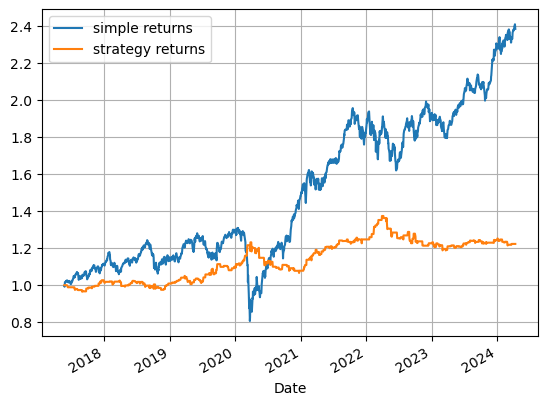

In [61]:
df[['simple returns','strategy returns']].cumprod().plot(grid = True)